# Anomaly Detection

In [15]:
import os
import sys 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

import pandas as pd
import matplotlib.pyplot as plt
from src.data_loader import DataLoader
from src.preprocessor import Preprocessor
from src.model_trainer import ModelTrainer
from src.evaluator import Evaluator

## Load Data

In [ ]:
loader = DataLoader("../data/raw/merged_data.csv")
df = loader.load_data()
prep = Preprocessor()
df = prep.clean_column_names(df)
X, y = prep.separate_features_targets(df)

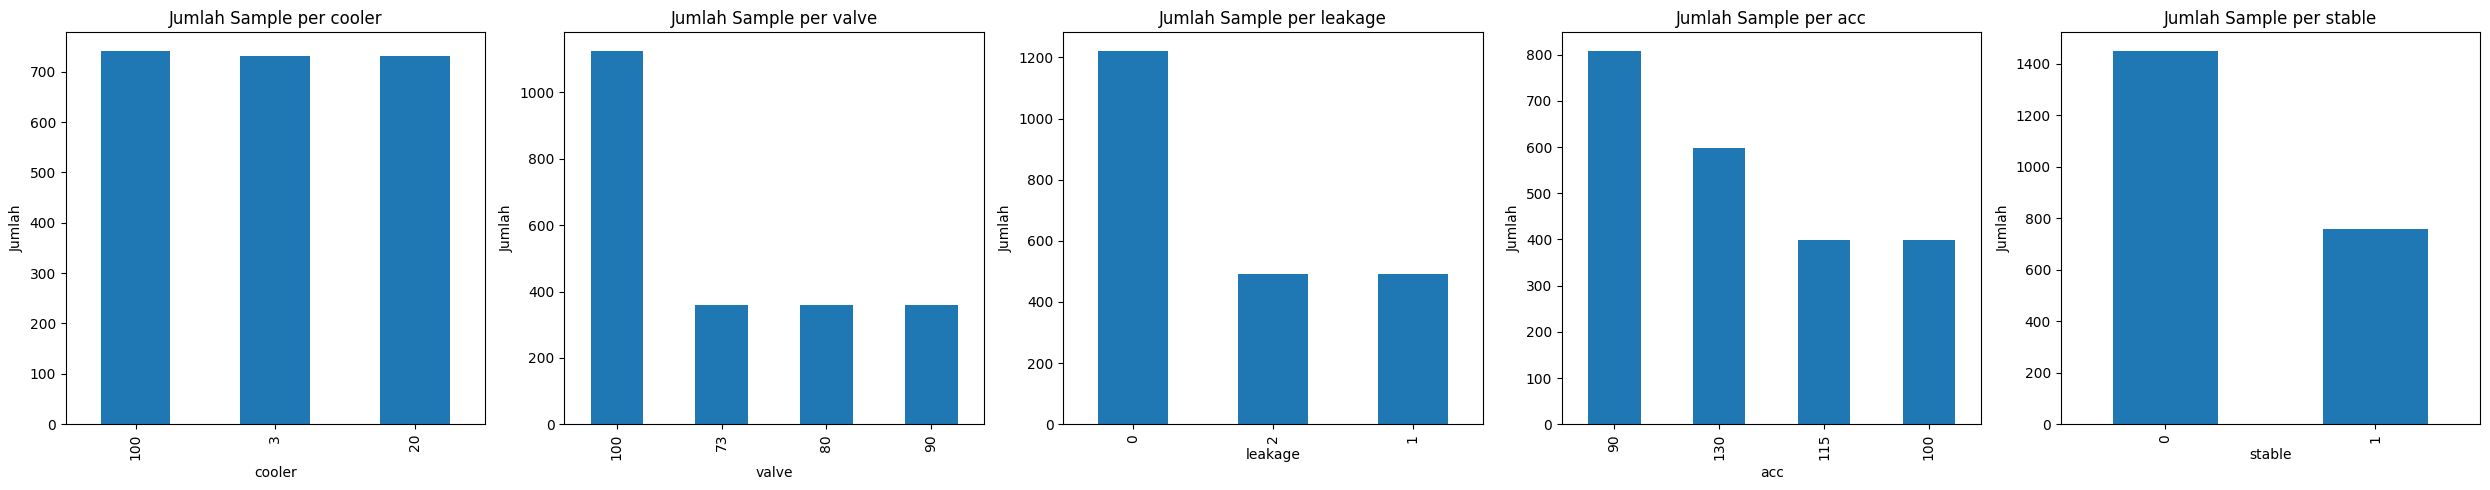

In [11]:
# Multiple bar chart untuk distribusi setiap kolom target

if isinstance(y, pd.DataFrame):
    fig, axes = plt.subplots(1, len(y.columns), figsize=(5 * len(y.columns), 5))
    for idx, col in enumerate(y.columns):
        y[col].value_counts().plot(kind='bar', ax=axes[idx], title=f'Jumlah Sample per {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Jumlah')
    plt.tight_layout()
    plt.show()
elif isinstance(y, pd.Series):
    y.value_counts().plot(kind='bar', title='Jumlah Sample per Kondisi')
    plt.xlabel(y.name if y.name else 'Kondisi')
    plt.ylabel('Jumlah')
    plt.show()

## Modeling

In [14]:
# Standarisasi fitur
X_scaled = prep.scale_features(X)

# Latih model
trainer = ModelTrainer(contamination=0.05)
trainer.train(X_scaled)
predictions = trainer.predict(X_scaled)

# Simpan model
trainer.save_model("../models/isolation_forest_model.pkl")

## Evaluation

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.94      0.77      1449
           1       0.17      0.03      0.04       756

    accuracy                           0.62      2205
   macro avg       0.41      0.48      0.40      2205
weighted avg       0.48      0.62      0.52      2205



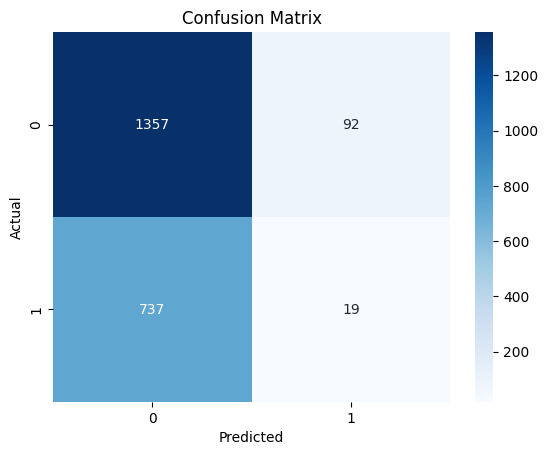

In [16]:
# Misalnya kita hanya pakai `stable` sebagai label referensi
y_true = df['stable'].values  # 0 = normal, 1 = broken
evaluator = Evaluator(y_true=y_true)
evaluator.evaluate(predictions)